# Worksheet 14

Name:  Maria Mercado Arevalo

UID: U958408

### Topics

- Naive Bayes
- Model Evaluation

### Naive Bayes

| Attribute A | Attribute B | Attribute C | Class |
|-------------|-------------|-------------|-------|
| Yes         | Single      | High        | No    |
| No          | Married     | Mid         | No    |
| No          | Single      | Low         | No    |
| Yes         | Married     | High        | No    |
| No          | Divorced    | Mid         | Yes   |
| No          | Married     | Low         | No    |
| Yes         | Divorced    | High        | No    |
| No          | Single      | Mid         | Yes   |
| No          | Married     | Low         | No    |
| No          | Single      | Mid         | Yes   |

a) Compute the following probabilities:

- P(Attribute A = Yes | Class = No)
- P(Attribute B = Divorced | Class = Yes)
- P(Attribute C = High | Class = No)
- P(Attribute C = Mid | Class = Yes)



*   P(Attribute A = Yes | Class = No) = 3/7  
*   P(Attribute B = Divorced | Class = Yes) = 1/3
*   P(Attribute C = High | Class = No) = 3/7
*   P(Attribute C = Mid | Class = Yes) = 1





b) Classify the following unseen records:

- (Yes, Married, Mid)
- (No, Divorced, High)
- (No, Single, High)
- (No, Divorced, Low)




*   $P(yes|c = yes) * P(Married|c = yes) * P(mid|c = yes)* P(c = yes) = 0$

  $P(yes|c = no) * P(Married|c = no) * P(mid|c = no) * P(c = no) = 3/7 * 4/7 * 1/7 * 7/10  = 6/245$

  Class No

*   $P(no|c = yes) * P(Divorced|c = yes) * P(high|c = yes) * P(c = yes)= 1 * 1/3 *  0  = 0$

  $P(no|c = no) * P(Divorced|c = no) * P(High|c = no)  * P(c = no) = 4/7 * 1/7 * 3/7 * 7/10 = 6/245$

  Class No

*   $P(no|c = yes) * P(Single|c = yes) * P(high|c = yes) * P(c = yes)= 1 * 2/3 * 0 = 0$

  $P(no|c = no) * P(Single|c = no) * P(High|c = no)  * P(c = no) = 4/7 * 2/7 * 3/7 * 7/10 = 12/645$

  Class No

*   $P(no|c = yes) * P(Divorced|c = yes) * P(low|c = yes) * P(c = yes) = 1 * 1/3 * 0 = 0$

  $P(no|c = no) * P(Divorced|c = no) * P(low|c = no) * P(c = no) = 4/7 * 1/7 * 3/7 * 7/10 = 6/245$

  Class No

















### Model Evaluation

a) Write a function to generate the confusion matrix for a list of actual classes and a list of predicted classes

In [14]:
actual_class = ["Yes", "No", "No", "Yes", "No", "No", "Yes", "No", "No", "No"]
predicted_class = ["Yes", "No", "Yes", "No", "No", "No", "Yes", "Yes", "Yes", "No"]

def confusion_matrix(actual, predicted):
  m = {"TP":0, "FN":0, "FP":0, "TN":0}
  map_ap = {("Yes","Yes"): "TP", ("Yes","No"): "FN", ("No","Yes"): "FP", ("No","No"): "TN"}
  for a,p in zip(actual,  predicted):
      m[map_ap[(a,p)]] += 1
  return [[m["TP"],m["FN"]],[m["FP"],m["TN"]]]

print(confusion_matrix(actual_class, predicted_class))

[[2, 1], [3, 4]]


b) Assume you have the following Cost Matrix:

|            | predicted = Y | predicted = N |
|------------|---------------|---------------|
| actual = Y |       -1      |       5       |
| actual = N |        10     |       0       |

What is the cost of the above classification?

$Cost = (-1*2) + (5*1) + (10*3) + (0*4) = -2 + 5 + 30 = 33$

c) Write a function that takes in the actual values, the predictions, and a cost matrix and outputs a cost. Test it on the above example.

In [15]:
import numpy as np
cost_matrix = [[-1,5],[10,0]]
def cost(actual, predicted, cost_matrix):
  cm = confusion_matrix(actual,predicted)
  return np.multiply(cost_matrix,cm).sum()

print(cost(actual_class, predicted_class,cost_matrix))

33


d) Implement functions for the following:

- accuracy
- precision
- recall
- f-measure

and apply them to the above example.

In [19]:
def map_cm(cm):
  a = cm[0][0]
  b = cm[0][1]
  c = cm[1][0]
  d = cm[1][1]
  return (a,b,c,d)
def accuracy(cm):
  a,b,c,d = map_cm(cm)
  return ((a + d)/(a + b + c + d))
def precision(cm):
  a,_,c,_ = map_cm(cm)
  return (a/(a + c))
def recall(cm):
  a,b,_,_ = map_cm(cm)
  return (a/(a + b))
def f_measure(cm):
  r = recall(cm)
  p = precision(cm)
  return ((2 * r * p)/(r + p))

cm = confusion_matrix(actual_class, predicted_class)
print(f'Accuracy: {accuracy(cm)}')
print(f'Precision: {precision(cm)}')
print(f'Recall: {recall(cm)}')
print(f'F-measure: {f_measure(cm)}')

Accuracy: 0.6
Precision: 0.4
Recall: 0.6666666666666666
F-measure: 0.5


## Some useful code for the midterm

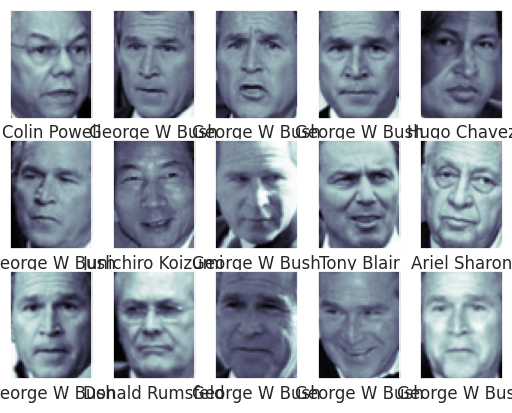

In [ ]:
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import fetch_lfw_people
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

sns.set()

# Get face data
faces = fetch_lfw_people(min_faces_per_person=60)

# plot face data
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])
plt.show()

# split train test set
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

pca = PCA(n_components=150, whiten=True)
svc = SVC(kernel='rbf', class_weight='balanced')
svcpca = make_pipeline(pca, svc)

# Tune model to find best values of C and gamma using cross validation
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
kfold = 10
grid = GridSearchCV(svcpca, param_grid, cv=kfold)
grid.fit(Xtrain, ytrain)

print(grid.best_params_)

# use the best params explicitly here
pca = PCA(n_components=150, whiten=True)
svc = SVC(kernel='rbf', class_weight='balanced', C=10, gamma=0.005)
svcpca = make_pipeline(pca, svc)

model = BaggingClassifier(svcpca, n_estimators=100).fit(Xtrain, ytrain)
yfit = model.predict(Xtest)

fig, ax = plt.subplots(6, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)
plt.show()

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

print("Accuracy = ", accuracy_score(ytest, yfit))